In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count            
len(cities)
print(len(cities))
cities_chart=pd.DataFrame(cities)
cities_chart.head(5)


598


,0
0,kavieng
1,kirakira
2,bredasdorp
3,bluff
4,rikitea


## Perform API Calls

In [12]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

Latitude=[]
Temperature=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
cities_new=[]

# Starting URL for Weather Map API Call
for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key+"&q="+city
        response=requests.get(url).json()
        Latitude.append(response["coord"]["lat"])
        Temperature.append(response["main"]["temp"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        cities_new.append(response["name"])
        city_name=response["name"]
        id_num=response["id"]
        print(f"City ID: {id_num}")
        print(f"City Name: {city}")
    except:
        pass
        
        


    



City ID: 2094342
City Name: kavieng
City ID: 2178753
City Name: kirakira
City ID: 1015776
City Name: bredasdorp
City ID: 2175403
City Name: bluff
City ID: 4030556
City Name: rikitea
City ID: 2075265
City Name: busselton
City ID: 3896218
City Name: castro
City ID: 3831208
City Name: qaanaaq
City ID: 5855927
City Name: hilo
City ID: 2069194
City Name: jamestown
City ID: 60019
City Name: eyl
City ID: 6167817
City Name: torbay
City ID: 1006984
City Name: east london
City ID: 4020109
City Name: atuona
City ID: 2414055
City Name: youkounkoun
City ID: 3418910
City Name: upernavik
City ID: 3517970
City Name: pochutla
City ID: 3922037
City Name: caranavi
City ID: 5106834
City Name: albany
City ID: 344979
City Name: lebu
City ID: 463144
City Name: zheshart
City ID: 525426
City Name: sobolevo
City ID: 1798473
City Name: puqi
City ID: 2110227
City Name: butaritari
City ID: 1273574
City Name: vaini
City ID: 6089245
City Name: norman wells
City ID: 5274887
City Name: suamico
City ID: 5848280
City Na

City ID: 1803567
City Name: linfen
City ID: 588365
City Name: vao
City ID: 1847947
City Name: shingu
City ID: 2015707
City Name: takhtamygda
City ID: 172515
City Name: abu samrah
City ID: 1674199
City Name: toucheng
City ID: 1072879
City Name: ankazoabo
City ID: 1298482
City Name: sagaing
City ID: 5221703
City Name: cumberland
City ID: 2025456
City Name: chernyshevskiy
City ID: 779622
City Name: havoysund
City ID: 1259395
City Name: porbandar
City ID: 3994607
City Name: nuevo ideal
City ID: 6295855
City Name: saint-georges
City ID: 156025
City Name: lembeni
City ID: 3448903
City Name: sao joao da barra
City ID: 6322184
City Name: porto novo
City ID: 3147822
City Name: gravdal
City ID: 3939761
City Name: hualmay
City ID: 1852357
City Name: shimoda
City ID: 240210
City Name: birao
City ID: 3423146
City Name: ilulissat
City ID: 1170219
City Name: mithi
City ID: 2016412
City Name: smidovich
City ID: 4001056
City Name: la orilla
City ID: 3177532
City Name: domodossola
City ID: 1106643
City 

City ID: 3451650
City Name: resplendor
City ID: 4164092
City Name: merritt island
City ID: 3105522
City Name: bereda
City ID: 5961417
City Name: husavik
City ID: 4334720
City Name: natchitoches
City ID: 468991
City Name: yarega
City ID: 1253628
City Name: lata
City ID: 543246
City Name: kozhva
City ID: 1337607
City Name: kudahuvadhoo
City ID: 2173911
City Name: broken hill
City ID: 2068110
City Name: kununurra
City ID: 2742416
City Name: barcelos
City ID: 3692029
City Name: saposoa
City ID: 3247453
City Name: soller
City ID: 2121909
City Name: poronaysk
City ID: 3402429
City Name: caucaia
City ID: 3652462
City Name: san cristobal
City ID: 2022463
City Name: khilok
City ID: 1056151
City Name: soavinandriana
City ID: 4267710
City Name: sitka
City ID: 3144987
City Name: beisfjord
City ID: 1269976
City Name: honavar
City ID: 3444176
City Name: robore
City ID: 764039
City Name: nidzica
City ID: 1786759
City Name: yicheng
City ID: 6127950
City Name: rossland
City ID: 2142316
City Name: yeppo

In [13]:
data_dict={"Cities":cities_new,
           "Latitude":Latitude,
           "Temperature":Temperature,
           "Humidity":Humidity,
           "Cloudiness":Cloudiness,
           "Wind Speed":Wind_Speed}
weather_chart=pd.DataFrame(data_dict)
weather_chart.head(10)

,Cities,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Kavieng,-2.57,83.12,100,68,6.76
1,Kirakira,-10.46,82.13,100,24,16.37
2,Bredasdorp,-34.53,57.20,87,68,1.12
3,Bluff,-23.58,71.87,50,0,9.66
4,Rikitea,-23.12,66.74,100,100,16.26
5,Busselton,-33.64,55.22,100,92,7.99
6,Castro,-42.48,37.49,99,0,3.40
7,Qaanaaq,77.48,32.45,100,0,2.73
8,Hilo,19.71,76.59,60,20,10.29
9,Jamestown,-33.21,46.67,100,88,19.62


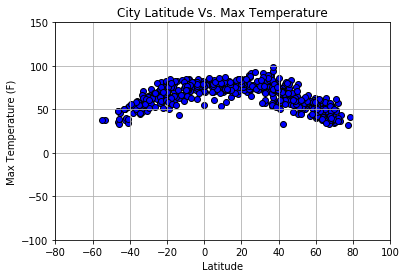

In [14]:
plt.scatter(weather_chart["Latitude"], weather_chart["Temperature"], color="blue", edgecolor="black")
plt.xlim(-80, 100)
plt.ylim(-100,150)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude Vs. Max Temperature")
plt.savefig("Temp_graph.png")

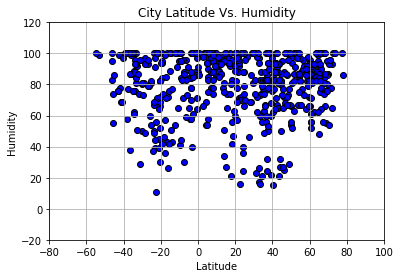

In [15]:
plt.scatter(weather_chart["Latitude"], weather_chart["Humidity"], color="blue", edgecolor="black")
plt.xlim(-80, 100)
plt.ylim(-20,120)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude Vs. Humidity")
plt.savefig("Humidity_graph.png")

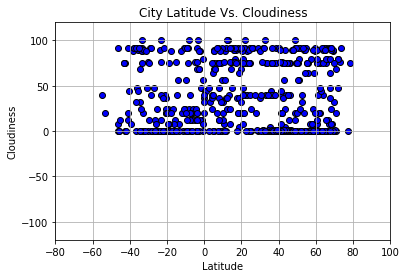

In [16]:
plt.scatter(weather_chart["Latitude"], weather_chart["Cloudiness"], color="blue", edgecolor="black")
plt.xlim(-80, 100)
plt.ylim(-120,120)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude Vs. Cloudiness")
plt.savefig("Cloudiness_graph.png")

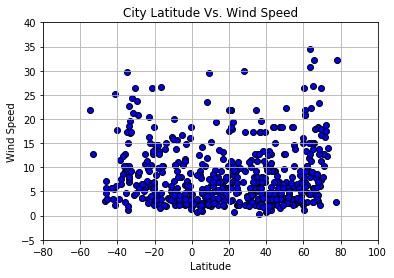

In [17]:
plt.scatter(weather_chart["Latitude"], weather_chart["Wind Speed"], color="blue", edgecolor="black")
plt.xlim(-80, 100)
plt.ylim(-5,40)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude Vs. Wind Speed")
plt.savefig("Wind_Speed_Graph")

## Three Observable Trends
1. Cities located closer to the equator generally have higher temperatures. This was expected. 
2. Humidity seems to be highest between 20 and 40 degrees latitude (or -20 and -40). This is right around the tropics of capricorn and tropics of cancer. Right near the euqator and near the poles has less humidity. 
3. No there is no correlation between latitude and cloudiness. 